# Clean and explore galaxy zoo datasets
This file details the data cleansing of the Galaxy Zoo dataset and explains the correlations found between the datasets features.
Mattias EYHERABIDE, Théo MOREL

  <img src="../Pics/AM0002.png" width="900"> </br>
Picture of AM0002 captured by Hubble telescope

## Abstract

### Galaxy zoo
...

### Galaxies classification
...

## Pre-processing
....
### Library imports

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Basic analysis

In [5]:
from IPython.core.display import display

def checkIfHasRowIncompatible(dataset, rowName1, rowName2):
    return dataset[dataset[rowName1] == 1][dataset[rowName2] == 1].shape[0] > 0

def VisualiseDataset(dataset):

    print("En-tête du dataset :\n----------\n")
    display(dataset.head())

    print("Informations des types du dataset :\n----------\n")
    display(dataset.info())

    print("\n----------\nTaille du dataset :")
    display(dataset.shape)

    print("Informations du dataset :\n----------\n")
    display(dataset.describe())

    print("Pourcentage de valeurs manquantes :\n----------\n")
    display((df.isna().sum()/df.shape[0]).sort_values())

    print("Vérification si valeurs multiple à 1 incompatible :\n----------\n")
    print("A ligne Spirale == Elliptique : {}\n".format(checkIfHasRowIncompatible(df, "SPIRAL", "ELLIPTICAL")))
    print("A ligne Spirale == Incertaine : {}\n".format(checkIfHasRowIncompatible(df, "SPIRAL", "UNCERTAIN")))
    print("A ligne Elliptique == Incertaine : {}\n".format(checkIfHasRowIncompatible(df, "ELLIPTICAL", "UNCERTAIN")))

    print("Type des valeurs :\n----------\n")
    display(df.dtypes.value_counts().plot.pie())

En-tête du dataset :
----------



,OBJID,RA,DEC,NVOTE,P_EL,P_CW,P_ACW,P_EDGE,P_DK,P_MG,P_CS,P_EL_DEBIASED,P_CS_DEBIASED,SPIRAL,ELLIPTICAL,UNCERTAIN
0,587727178986356823,00:00:00.41,-10:22:25.7,59,0.610,0.034,0.000,0.153,0.153,0.051,0.186,0.610,0.186,0,0,1
1,587727227300741210,00:00:00.74,-09:13:20.2,18,0.611,0.000,0.167,0.222,0.000,0.000,0.389,0.203,0.797,1,0,0
2,587727225153257596,00:00:01.03,-10:56:48.0,68,0.735,0.029,0.000,0.147,0.074,0.015,0.176,0.432,0.428,0,0,1
3,587730774962536596,00:00:01.38,+15:30:35.3,52,0.885,0.019,0.000,0.058,0.019,0.019,0.077,0.885,0.077,0,1,0
4,587731186203885750,00:00:01.55,-00:05:33.3,59,0.712,0.000,0.000,0.220,0.068,0.000,0.220,0.640,0.290,0,0,1


Informations des types du dataset :
----------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667944 entries, 0 to 667943
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   OBJID          667944 non-null  int64  
 1   RA             667944 non-null  object 
 2   DEC            667944 non-null  object 
 3   NVOTE          667944 non-null  int64  
 4   P_EL           667944 non-null  float64
 5   P_CW           667944 non-null  float64
 6   P_ACW          667944 non-null  float64
 7   P_EDGE         667944 non-null  float64
 8   P_DK           667944 non-null  float64
 9   P_MG           667944 non-null  float64
 10  P_CS           667944 non-null  float64
 11  P_EL_DEBIASED  667944 non-null  float64
 12  P_CS_DEBIASED  667944 non-null  float64
 13  SPIRAL         667944 non-null  int64  
 14  ELLIPTICAL     667944 non-null  int64  
 15  UNCERTAIN      667944 non-null  int64  
dtypes: float64(9), int64(5), o

None


----------
Taille du dataset :


(667944, 16)

Informations du dataset :
----------



,OBJID,NVOTE,P_EL,P_CW,P_ACW,P_EDGE,P_DK,P_MG,P_CS,P_EL_DEBIASED,P_CS_DEBIASED,SPIRAL,ELLIPTICAL,UNCERTAIN
count,6.679440e+05,667944.000000,667944.000000,667944.000000,667944.000000,667944.000000,667944.000000,667944.000000,667944.000000,667944.000000,667944.000000,667944.000000,667944.000000,667944.000000
mean,5.878143e+17,38.760986,0.535947,0.074007,0.080736,0.205066,0.072924,0.031244,0.359850,0.393508,0.483439,0.284792,0.093107,0.622102
std,1.796023e+14,13.827837,0.284315,0.174440,0.179102,0.216642,0.085788,0.089369,0.298643,0.301595,0.321747,0.451316,0.290582,0.484862
min,5.877230e+17,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.877320e+17,28.000000,0.306000,0.000000,0.000000,0.054000,0.018000,0.000000,0.102000,0.106000,0.180000,0.000000,0.000000,0.000000
50%,5.877386e+17,34.000000,0.581000,0.016000,0.021000,0.130000,0.053000,0.000000,0.267000,0.347000,0.462000,0.000000,0.000000,1.000000
75%,5.877428e+17,51.000000,0.783000,0.051000,0.062000,0.275000,0.103000,0.020000,0.586000,0.664000,0.789000,1.000000,0.000000,1.000000
max,5.888489e+17,94.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Pourcentage de valeurs manquantes :
----------



OBJID            0.0
RA               0.0
DEC              0.0
NVOTE            0.0
P_EL             0.0
P_CW             0.0
P_ACW            0.0
P_EDGE           0.0
P_DK             0.0
P_MG             0.0
P_CS             0.0
P_EL_DEBIASED    0.0
P_CS_DEBIASED    0.0
SPIRAL           0.0
ELLIPTICAL       0.0
UNCERTAIN        0.0
dtype: float64

Vérification si valeurs multiple à 1 incompatible :
----------

A ligne Spirale == Elliptique : False

A ligne Spirale == Incertaine : False

A ligne Elliptique == Incertaine : False

Type des valeurs :
----------



<AxesSubplot:ylabel='None'>

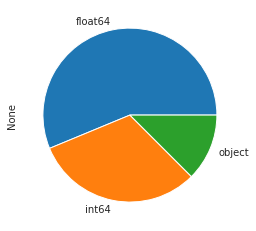

In [6]:
data = pd.read_csv("../../Datas/GalaxyZoo1_DR_table2.csv")
df = data.copy()
VisualiseDataset(df)

'### Basic checklist
- **Targets variables** : Spiral, Elliptical and Uncertain
- **lines and columns** : (667944, 16)
- **Type de variables** : Majortiée de numérique, le reste sont objet (ici des dates)
- **Analyse des valeurs manquantes** : Aucunes valeurs manquantes

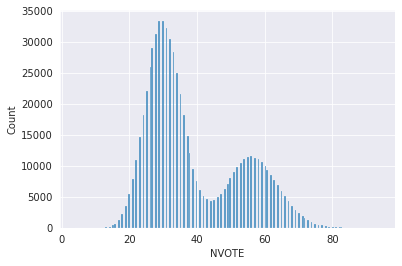

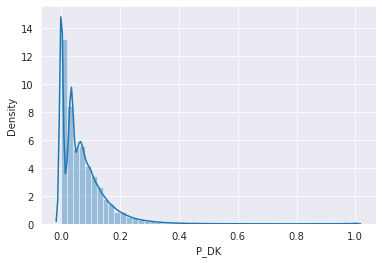

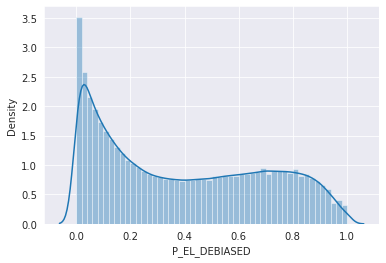

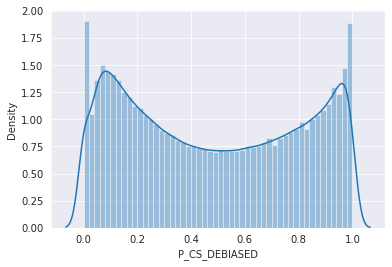

In [7]:
dfbiased = df.copy()
dfbiased.drop(['OBJID', 'P_CS', 'P_EL', 'P_CW', 'P_MG', 'P_ACW', 'P_EDGE', 'RA', 'DEC', 'ELLIPTICAL', 'SPIRAL', 'UNCERTAIN'], axis=1, inplace=True)
sns.histplot(dfbiased['NVOTE'])

for col in dfbiased.select_dtypes('double'):
    plt.figure()
    sns.distplot(df[col])


Supression des valeurs ou le nombre de vote est inférieur à 50.

In [8]:
shapeBase = len(df.index)
df = df[df.NVOTE >= 15]
df = df[df.P_DK > 0.05]
shapeAfterModif = len(df.index)

print("Nombre de ligne suprimées : ")
print(shapeBase - shapeAfterModif)

df.shape

Nombre de ligne suprimées : 
327417


(340527, 16)

In [9]:
correlationDf = df.copy()
correlationDf.drop(['OBJID', 'NVOTE', 'DEC', 'RA', 'SPIRAL', 'UNCERTAIN', 'ELLIPTICAL'], axis=1, inplace=True)

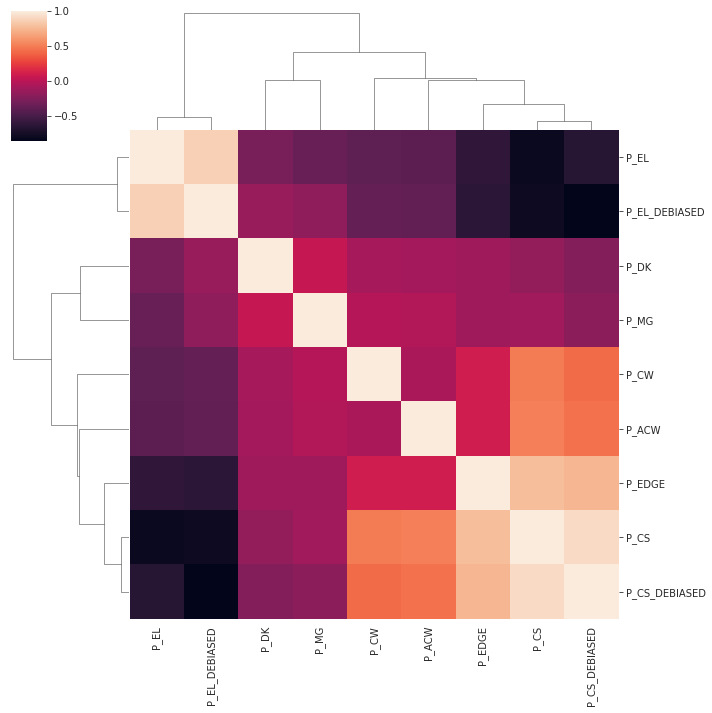

In [10]:
sns.clustermap(correlationDf.corr())

Création d'un dataset final

In [11]:
print("Nombre de galaxies ayant le statut MERGED :", df["P_MG"][df["P_MG"] > 0.4].count())

Nombre de galaxies ayant le statut MERGED : 6609


In [12]:
dfWithPreProcess = df.copy()
dfWithPreProcess.drop(['NVOTE', 'P_EL', 'P_CW', 'P_ACW', 'P_EDGE', 'P_DK', 'P_CS', 'P_EL_DEBIASED', 'P_CS_DEBIASED'], axis=1, inplace=True)

In [13]:
dfWithPreProcess['MERGED'] = np.where(df['P_MG'] > 0.5, 1, 0)
dfWithPreProcess.head()

,OBJID,RA,DEC,P_MG,SPIRAL,ELLIPTICAL,UNCERTAIN,MERGED
0,587727178986356823,00:00:00.41,-10:22:25.7,0.051,0,0,1,0
2,587727225153257596,00:00:01.03,-10:56:48.0,0.015,0,0,1,0
4,587731186203885750,00:00:01.55,-00:05:33.3,0.000,0,0,1,0
5,587727180060098638,00:00:01.57,-09:29:40.3,0.000,0,0,1,0
6,587731187277627676,00:00:01.86,+00:43:09.3,0.053,0,0,1,0


In [14]:
#Merge the three columns by using their name as type in the column "TYPE".
columns = ["MERGED", "SPIRAL", "ELLIPTICAL", "UNCERTAIN"]
for name in columns: dfWithPreProcess.loc[dfWithPreProcess[name]==1, 'TYPE'] = name
#Drop all columns not needed and each rows with type "UNCERTAIN"
dfWithPreProcess.drop(index=dfWithPreProcess[dfWithPreProcess['TYPE'] == "UNCERTAIN"].index,
    columns=['P_MG', 'UNCERTAIN', "MERGED", "ELLIPTICAL", "SPIRAL"], inplace=True)
dfWithPreProcess.to_csv('../Datas/dataWithPreProcess.csv', index=False)
dfWithPreProcess.head()

FileNotFoundError: [Errno 2] No such file or directory: '../Datas/dataWithPreProcess.csv'

In [ ]:
dfShow = dfWithPreProcess[dfWithPreProcess["TYPE"] == "MERGED"]
dfShow.head()

In [ ]:
dfShow = dfWithPreProcess[dfWithPreProcess["TYPE"] == "ELLIPTICAL"]
dfShow.head()

In [ ]:
dfShow = dfWithPreProcess[dfWithPreProcess["TYPE"] == "SPIRAL"]
dfShow.head()

In [ ]:
dfShow = dfWithPreProcess[dfWithPreProcess["TYPE"] == "UNKNOWN"]
dfShow.head()